In [ ]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
import pandas as pd

penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
# Pearson correlation
from scipy.stats import pearsonr

In [ ]:
pearsonr(penguins["flipper_length_mm"], penguins["body_mass_g"])


PearsonRResult(statistic=0.8729788985653614, pvalue=3.13283625097126e-105)

In [ ]:
# regression
from statsmodels.formula.api import ols

In [ ]:
formula = "body_mass_g ~ flipper_length_mm"
lm = ols(formula, penguins).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          3.13e-105
Time:                        12:10:26   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
Male_Penguins = penguins.loc[penguins["sex"] == "Male", "body_mass_g"]
Female_Penguins = penguins.loc[penguins["sex"] == "Female", "body_mass_g"]

Male_Penguins.head(), Female_Penguins.head()

(0     3750.0
 5     3650.0
 7     4675.0
 13    3800.0
 14    4400.0
 Name: body_mass_g, dtype: float64,
 1     3800.0
 2     3250.0
 4     3450.0
 6     3625.0
 12    3200.0
 Name: body_mass_g, dtype: float64)

In [ ]:
# t test
ttest_ind(Male_Penguins, Female_Penguins)

Ttest_indResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16)

In [ ]:
# one way ANOVA
from scipy.stats import f_oneway

Adelie = penguins.loc[penguins["species"] == "Adelie", "body_mass_g"]
Chinstrap = penguins.loc[penguins["species"] == "Chinstrap", "body_mass_g"]
Gentoo = penguins.loc[penguins["species"] == "Gentoo", "body_mass_g"]

In [ ]:
f_oneway(Adelie, Chinstrap, Gentoo)

F_onewayResult(statistic=341.8948949481461, pvalue=3.74450512630046e-81)

In [ ]:
from statsmodels.stats.anova import anova_lm

formula = "body_mass_g ~ species + sex + species:sex"
lm = ols(formula,data = penguins).fit()

In [ ]:
anova_table = anova_lm(lm, typ=2)
print(anova_table)

                   sum_sq     df           F         PR(>F)
species      1.434016e+08    2.0  749.015666  8.144406e-123
sex          3.709026e+07    1.0  387.459976   1.902273e-57
species:sex  1.676557e+06    2.0    8.756997   1.973489e-04
Residual     3.130263e+07  327.0         NaN            NaN


In [ ]:
# chi squared
import numpy as np
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(index = penguins["species"], columns = penguins["sex"])
cross_tab_matrix = np.array(cross_tab)
cross_tab

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [ ]:
# The p-value is > 0.05, this means the two factors are independent and there is no relationship between the species and sex of a penguin.

chi2_contingency(cross_tab_matrix)[1]

0.9759893689765846

In [ ]:
# correlation among binary variables - Phi Coefficient

In [1]:
# Import necessary packages
from sklearn.metrics import matthews_corrcoef

# Create two assumed binary variables
X = [1, 1, 0, 0, 1, 0]
Y = [1, 0, 1, 1, 0, 1]



In [2]:
# Calculate MCC
mcc = matthews_corrcoef(X, Y)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: -0.7071067811865476


In [3]:
# Import necessary libraries
import pandas as pd
import math

# Create a dataframe
df = pd.DataFrame({'X': ['A', 'A', 'B', 'B', 'A', 'B'], 'Y': ['W', 'X', 'W', 'W', 'X', 'W']})

print(df)

   X  Y
0  A  W
1  A  X
2  B  W
3  B  W
4  A  X
5  B  W


In [5]:
# Create a contingency table
table = pd.crosstab(df['X'], df['Y'])
print(table)

Y  W  X
X      
A  1  2
B  3  0


In [11]:
from scipy.stats import chi2_contingency
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = chi2_contingency(table)

#Calculate Cramer's V
V = math.sqrt(chi2 / (table.values.sum()*min(table.shape[0]-1, table.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.3535533905932738


In [12]:
!pip install dython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [1]:
import pandas as pd
from dython.nominal import associations

In [2]:
URL ='https://raw.githubusercontent.com/adamerose/datasets/master/pokemon.csv'
df= pd.read_csv(URL)

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Name', 'Type 1', 'Type 2']

In [10]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<ipython-input-10-0f00376ac5b1>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.00,1.00,0.30,0.34,0.12,0.10,0.10,0.09,0.09,0.09,0.01,0.98,0.15
Name,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Type 1,0.30,0.00,1.00,0.20,0.30,0.25,0.34,0.44,0.45,0.27,0.31,0.25,0.34
Type 2,0.34,0.00,0.20,1.00,0.30,0.23,0.33,0.38,0.29,0.23,0.35,0.31,0.20
Total,0.12,1.00,0.30,0.30,1.00,0.62,0.74,0.61,0.75,0.72,0.58,0.05,0.50
HP,0.10,1.00,0.25,0.23,0.62,1.00,0.42,0.24,0.36,0.38,0.18,0.06,0.27
Attack,0.10,1.00,0.34,0.33,0.74,0.42,1.00,0.44,0.40,0.26,0.38,0.05,0.35
Defense,0.09,1.00,0.44,0.38,0.61,0.24,0.44,1.00,0.22,0.51,0.02,0.04,0.25
Sp. Atk,0.09,1.00,0.45,0.29,0.75,0.36,0.40,0.22,1.00,0.51,0.47,0.04,0.45
Sp. Def,0.09,1.00,0.27,0.23,0.72,0.38,0.26,0.51,0.51,1.00,0.26,0.03,0.36


In [11]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:158: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:158: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


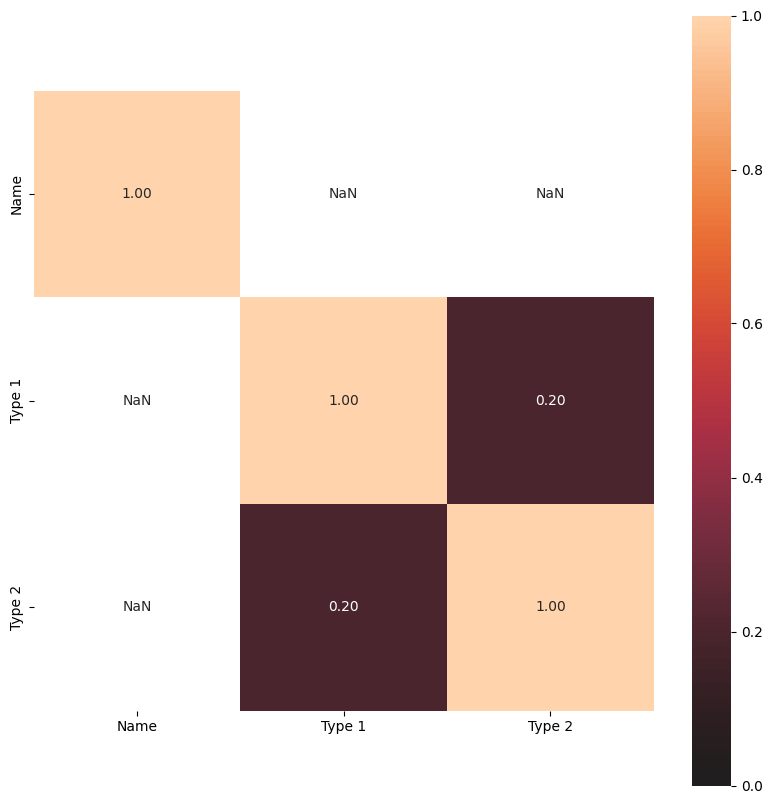

In [12]:
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))